In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNEL=3
EPOCHS=50



In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Training/Dataset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
                    )

Found 3000 files belonging to 2 classes.


In [4]:
class_names=dataset.class_names
class_names


['no', 'yes']

In [5]:
len(dataset)



94

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1]


[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


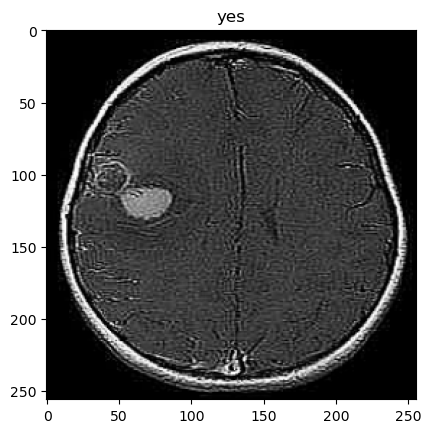

In [7]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    

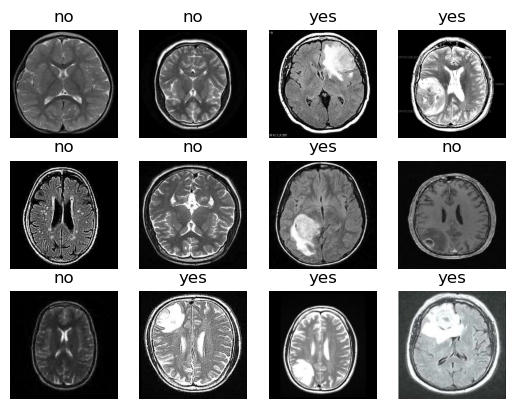

In [8]:
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [9]:
len(dataset)

94

In [10]:
#80% ==> training 
#20% ==> 10% validation,10% test


In [11]:
train_size=0.8
len(dataset)*train_size


75.2

In [12]:
train_ds=dataset.take(75)
len(train_ds)

75

In [13]:
test_ds =dataset.skip(75)
len(test_ds
   )

19

In [14]:
val_size=0.1
len(dataset)*val_size


9.4

In [15]:
val_ds=test_ds.take(9)
len(val_ds)

9

In [16]:
test_ds=test_ds.skip(9)
len(test_ds)

10

In [17]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds =ds.shuffle(shuffle_size,seed=12)
    train_size= int(train_split * ds_size)
    val_size =int(val_split * ds_size)
    train_ds=ds.take(train_size)
                
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [18]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)


In [19]:
len(train_ds)

75

In [20]:
len(val_ds)

9

In [21]:
len(test_ds)

10

In [22]:
#video:1-26:37
#Read image from the disk and 
#have to watch :SHUFFLE VIDEO
#prefetch & Batch:-CPU reading batch 1 ,then GPU training 1,that time CPU reading 
# batch 2;

In [23]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [24]:
resize_and_rescale= tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])


In [25]:
#Data Augmentation,Random Flip,Random Rotation;
data_augmentation=tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(0.2)
])

In [26]:
# Define your batch size and image size
BATCH_SIZE = 32
IMAGE_SIZE = (256, 256)
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL)
# Create a Sequential model
resnet_model = Sequential()

# Load the ResNet-50 model with pretrained wSeights and remove the top classification layer
pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
    pooling='avg',
    weights='imagenet'
)

# Make all layers in the pretrained model trainable
for layer in pretrained_model.layers:
    layer.trainable = True

# Add the pretrained model to your custom model
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))  # Change the output units to 1 for binary classification

resnet_model.build(input_shape=input_shape)




In [27]:
resnet_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 1)                 513       
 apper)                                                          
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 24584193 (93.78 MB)
Non-trainable params: 53120 (207.50 KB)
________

In [28]:
# Compile the model with an appropriate loss function for binary classification
resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming you have defined train_ds and val_ds correctly
history = resnet_model.fit(
    train_ds,
    epochs=10,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds)

Epoch 1/10
75/75 [==============================] - 1582s 18s/step - loss: 0.5009 - accuracy: 0.8290 - val_loss: 3905.9854 - val_accuracy: 0.4722
Epoch 2/10
75/75 [==============================] - 942s 13s/step - loss: 0.2147 - accuracy: 0.9231 - val_loss: 552.8877 - val_accuracy: 0.4757
Epoch 3/10
75/75 [==============================] - 897s 12s/step - loss: 0.1220 - accuracy: 0.9557 - val_loss: 0.6075 - val_accuracy: 0.8472
Epoch 4/10
75/75 [==============================] - 911s 12s/step - loss: 0.0791 - accuracy: 0.9716 - val_loss: 61.6225 - val_accuracy: 0.4861
Epoch 5/10
75/75 [==============================] - 923s 12s/step - loss: 0.0606 - accuracy: 0.9812 - val_loss: 0.0874 - val_accuracy: 0.9861
Epoch 6/10
75/75 [==============================] - 960s 13s/step - loss: 0.0315 - accuracy: 0.9879 - val_loss: 0.1567 - val_accuracy: 0.9479
Epoch 7/10
75/75 [==============================] - 1095s 15s/step - loss: 0.0307 - accuracy: 0.9895 - val_loss: 2.5506 - val_accuracy: 0.875

In [43]:
scores = resnet_model.evaluate(test_ds)
scores


  

10/10 [==============================] - 22s 2s/step - loss: 0.3527 - accuracy: 0.9531


[0.3527180254459381, 0.953125]

In [44]:
# loaded_model = tf.keras.models.load_model('F:/1.BrainTumor/models/1')
history


In [45]:
# scores = loaded_model.evaluate(test_ds)
# scores
history.params


{'verbose': 1, 'epochs': 10, 'steps': 75}

In [46]:
# history=loaded_model.history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

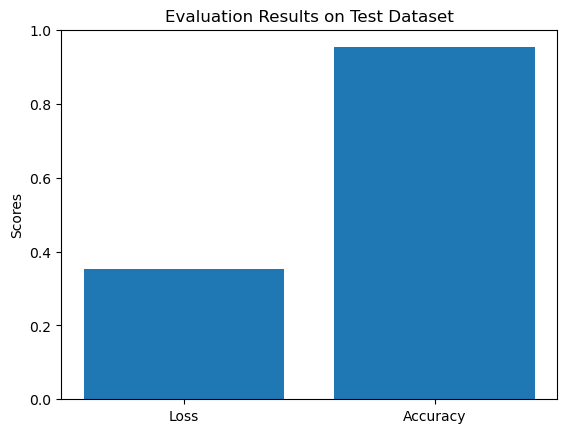

In [48]:
# loaded_model.history.params
type(history.history['loss'])
loss = scores[0]
accuracy = scores[1]

# Plotting the evaluation results
fig, ax = plt.subplots()
ax.bar(['Loss', 'Accuracy'], [loss, accuracy])
ax.set_ylabel('Scores')
ax.set_title('Evaluation Results on Test Dataset')

plt.show()

In [33]:
# print(history.history.keys())

In [ ]:
len(history.history['loss'])

In [39]:
history.history['loss'][:5]

[0.5008806586265564,
 0.21467873454093933,
 0.12202233076095581,
 0.07911243289709091,
 0.06060285121202469]

In [50]:
# len(history.history['loss'])
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

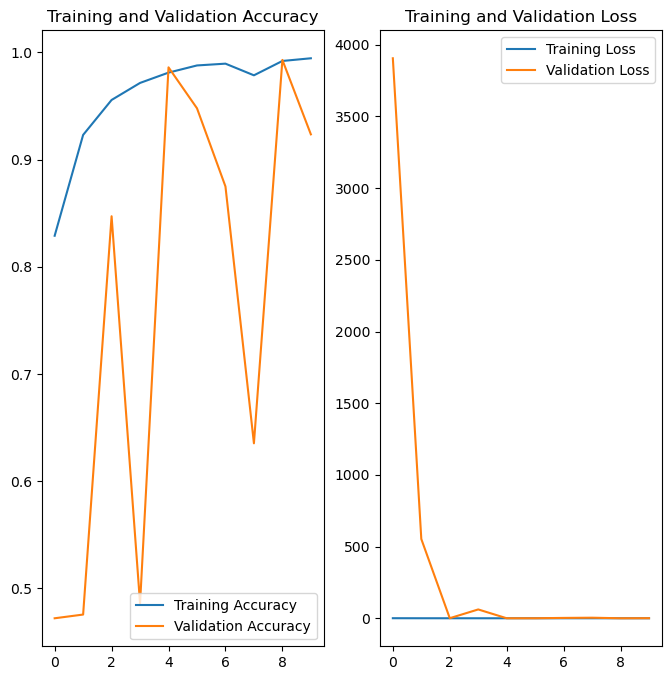

In [52]:
# history.history['loss'][:5] # show loss for first 5 epochs
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [102]:

# Assuming 'images', 'i', 'class_names' are accessible within the scope

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    class_names = [...]  # Replace with your actual class names
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)

    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence: {confidence}%")

    return predicted_class, confidence

# Assuming 'model', 'images', and 'i' are defined




1/1 [==============================] - 0s 184ms/step


IndexError: list index out of range

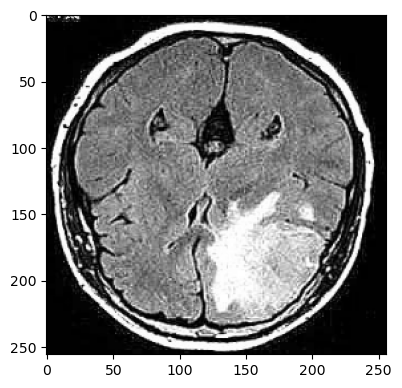

In [93]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(resnet_model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [57]:
import os
model_version=max([int(i) for i in os.listdir("models") + [0]])+1
resnet_model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/2\assets


INFO:tensorflow:Assets written to: models/2\assets


In [61]:
import tensorflow as tf
import numpy as np

def predict(model, img, class_names, images):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = resnet_model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 243ms/step


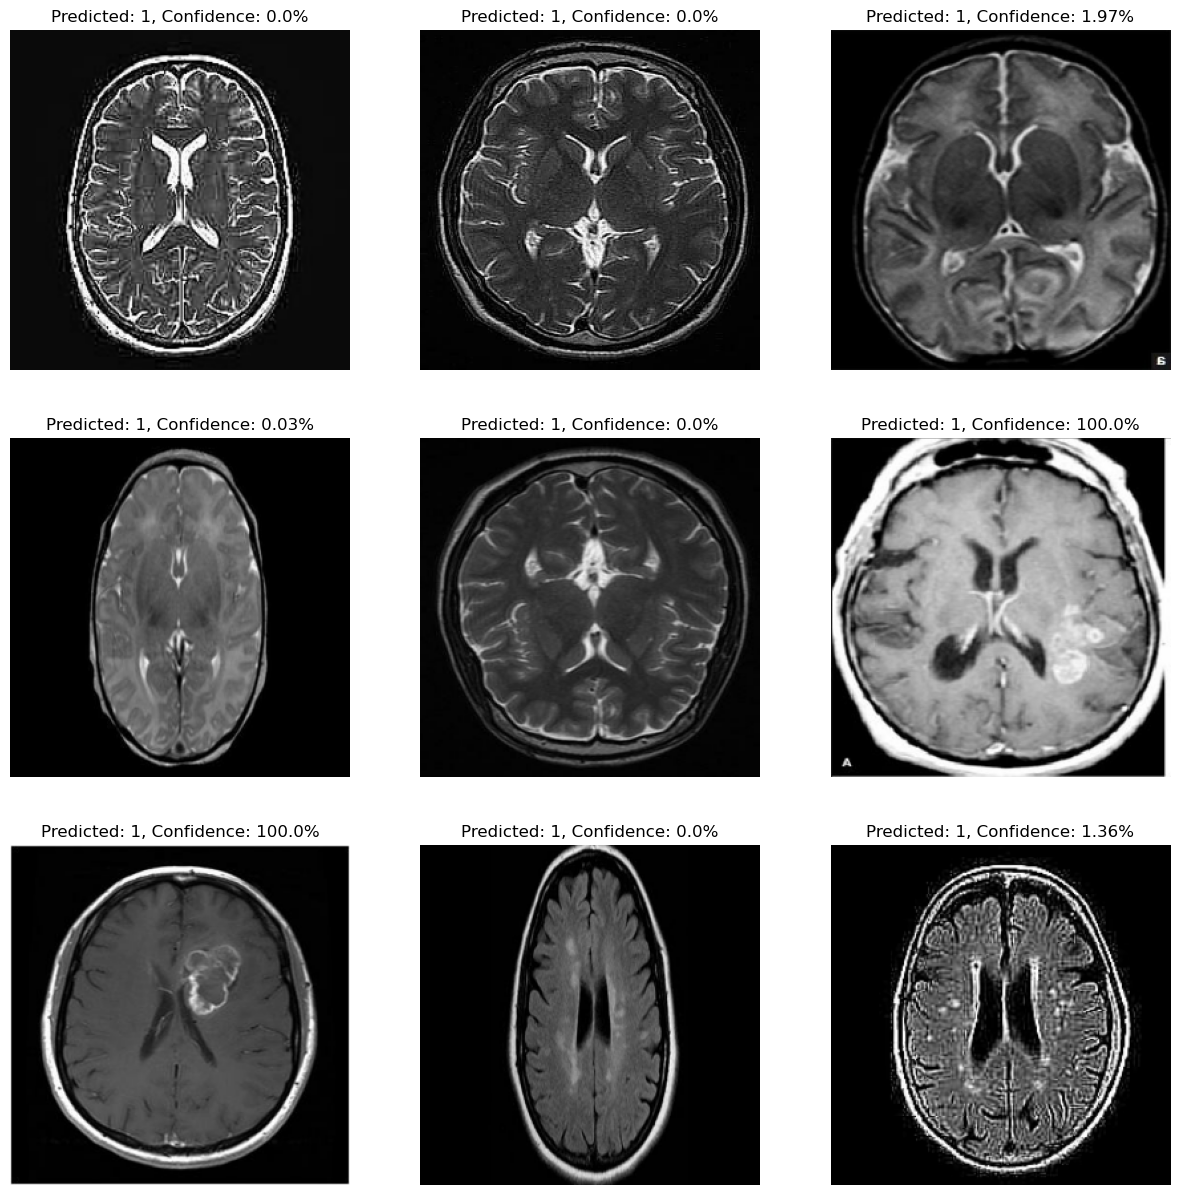

In [90]:

# # Assuming the 'predict' function is defined properly
# plt.figure(figsize=(15, 15))
# for images, labels in test_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
        
#         predicted_class, confidence = predict(resnet_model, images[i].numpy(),)
#         actual_class = class_names[labels[i]] 
        
#         plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
#         plt.axis("off")

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'images', 'class_names', and 'i' are accessible within the scope

def predict(model, img, class_names):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = resnet_model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    return predicted_class, confidence

# Assuming 'model', 'class_names', 'images' are defined

plt.figure(figsize=(15, 15))
for i in range(min(9, len(images))):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img = img_array.astype('uint8')
    
    predicted_class, confidence = predict(resnet_model, img, class_names)

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}, Confidence: {confidence}%")
    plt.axis('off')

plt.show()


In [ ]:
import os
model_version=max([int(i) for i in os.listdir("models") + [0]])+1
model.save(f"models/{model_version}")

In [ ]:
#model.save("../BrainTumor.h5")

first image to predict


IndexError: list index out of range

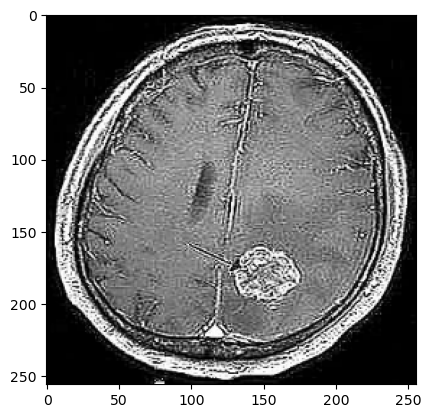

In [94]:

import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:

from PIL import Image
import numpy as np

# Load the image
image = Image.open('Tumor.jpeg')

# Convert the PIL image to a NumPy array
image_np = np.array(image)
plt.imshow(image_np.astype("uint8"))
# Perform any necessary preprocessing here (e.g., resizing, normalization)
# You should match the preprocessing steps used during model training.

# Pass the preprocessed image as input to your model's predict method
predictions = model.predict(np.expand_dims(image_np, axis=0))

# Process the predictions as needed (e.g., getting class labels or confidence scores)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = 100 * np.max(predictions[0])

print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence:.2f}%")


In [ ]:
# #BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNEL
# resnet_model = Sequential()

# pretrained_model= tf.keras.applications.ResNet50(include_top=False,
#                    input_shape=(256,256,3),
#                    pooling='avg',classes=2,
#                    weights='imagenet')
# for layer in pretrained_model.layers:
#         layer.trainable=False

# resnet_model.add(pretrained_model)
# resnet_model.add(Flatten())
# resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(Dense(2, activation='softmax'))
     

In [ ]:
# resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])




In [ ]:
# history2 = resnet_model.fit(
#     train_ds,
#     epochs=50,
#     batch_size=BATCH_SIZE,
#     verbose=1,
#     validation_data=val_ds, 
  
# )

In [ ]:
# Define your batch size and image size
BATCH_SIZE = 32
IMAGE_SIZE = (256, 256)

# Create a Sequential model
resnet_model = Sequential()

# # Load the ResNet-50 model with pretrained weights and remove the top classification layer
# pretrained_model = tf.keras.applications.ResNet50(
#     include_top=False,
#     input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
#     pooling='avg',
#     weights='imagenet'
# )

# # Make all layers in the pretrained model trainable
# for layer in pretrained_model.layers:
#     layer.trainable = True

# # Add the pretrained model to your custom model
# resnet_model.add(pretrained_model)
# resnet_model.add(Flatten())
# resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(Dense(1, activation='sigmoid'))  # Change the output units to 1 for binary classification

# # Compile the model with an appropriate loss function for binary classification
# resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Assuming you have defined train_ds and val_ds correctly
# history = resnet_model.fit(
#     train_ds,
#     epochs=50,
#     batch_size=BATCH_SIZE,
#     verbose=1,
#     validation_data=val_ds
# )

In [ ]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

In [ ]:
# scores = model.evaluate(test_ds)

In [96]:
import os
model_version=max([int(i) for i in os.listdir("models") + [0]])+1
resnet_model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/3\assets


INFO:tensorflow:Assets written to: models/3\assets
